# Working with Programs

In Brush, a *Program* is an executable data structure. 
You may think of it as a *model* or a *function* mapping feature inputs to data labels. 
We call them programs because that's what they are: executable data structures,  
and that is what they are called in the genetic algorithm literature, to distinguish them from optimizing bits or strings. 

The Brush Program class operates similarly to a [sklearn](scikit-learn.org) estimator: it has `fit` and `predict` methods that are called in during training or inference, respectively. 


## Types of Programs 

There are four fundamental "types" of Brush programs:

- **Regressors**: map inputs to a continous endpoint 
- **Binary Classifiers**: map inputs to a binary endpoint, as well as a continuous value in $[0, 1]$  
- **Multi-class Classifiers**: map inputs to a category
    - Under development
- **Representors**: map inputs to a lower dimensional space. 
    - Under development

## Representation 

Internally, the programs are represented as syntax trees. 
We use the [tree.hh tree class](https://github.com/kpeeters/tree.hh) which gives trees an STL-like feel. 



## Generation

We generate random programs using Sean Luke's PTC2 algorithm.  


## Evaluation

TODO




## Visualizing Programs

Programs in Brush are symbolic tree structures, and can be viewed in a few ways: 


1. As a string using `get_model()`
2. As a string-like tree using `get_model("tree")`
2. As a graph using `graphviz` and `get_model("dot")`. 

Let's look at a regresion example.

In [1]:
import pandas as pd
from brush import BrushRegressor
from pmlb import fetch_data

# load data
df = pd.read_csv('../examples/datasets/d_enc.csv')
X = df.drop(columns='label')
y = df['label']
# X, y = fetch_data('1027_ESL', return_X_y = True)
# X, y = fetch_data('192_vineyard', return_X_y = True)
# X, y = fetch_data('594_fri_c2_100_5', return_X_y = True)
# X, y = fetch_data('607_fri_c4_1000_50', return_X_y = True)
# X, y = fetch_data('503_wind', return_X_y = True)



In [2]:
# import and make a regressor
est = BrushRegressor(
    max_depth=6, 
    max_size=100,
    functions=['SplitBest','Add','Sub','Mul','Div']
)

# use like you would a sklearn regressor
est.fit(X,y)
y_pred = est.predict(X)

/home/bill/projects/brush/src/brush/estimator.py:251: RuntimeWarning: overflow encountered in square
  np.sum((data.y- ind.prg.predict(data))**2),
/home/bill/mambaforge/envs/brush/lib/python3.11/site-packages/deap/tools/emo.py:139: RuntimeWarning: invalid value encountered in scalar divide
  distances[cur[1]] += (next[0][i] - prev[0][i]) / norm
/home/bill/mambaforge/envs/brush/lib/python3.11/site-packages/deap/tools/emo.py:139: RuntimeWarning: invalid value encountered in scalar subtract
  distances[cur[1]] += (next[0][i] - prev[0][i]) / norm
/home/bill/mambaforge/envs/brush/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


best model: If(x0>0.75,If(x0>0.81,Sub(If(x6>0.17,Add(Sub(0.06*x2,Sub(24.45*x6,17.30*x0)),-10.36),0.07*x2),Sub(-41.73*x6,2.03*x0)),49.48*x0),0.02*x1)


In [3]:
print('score:', est.score(X,y))

score: 0.9157169010210909


Now that we have trained a model, `est.best_estimator_` contains our symbolic model. 
We can view it as a string:

In [4]:
print(est.best_estimator_.get_model())

If(x0>0.75,If(x0>0.81,Sub(If(x6>0.17,Add(Sub(0.06*x2,Sub(24.45*x6,17.30*x0)),-10.36),0.07*x2),Sub(-41.73*x6,2.03*x0)),49.48*x0),0.02*x1)


We can view it as a tree:

In [5]:
print(est.best_estimator_.get_model("tree"))

SplitBest
|-SplitBest
  |-Sub
    |-SplitBest
      |-Add
        |-Sub
          |-0.06*x2
          |-Sub
          |  |-24.45*x6
          |  |-17.30*x0
        |--10.36
      |-0.07*x2
    |-Sub
    |  |--41.73*x6
    |  |-2.03*x0
  |-49.48*x0
|-0.02*x1


We can also view it as a graph in dot format. 
Let's import graphviz and make a nicer plot.

digraph G {
SplitBest;
SplitBest -> x0 [label=">0.75?", dir=none];
SplitBest -> SplitBest [label="Y", dir=none];
SplitBest -> x1 [label="0.02", dir=none];
SplitBest;
SplitBest -> x0 [label=">0.81?", dir=none];
SplitBest -> Sub [label="Y", dir=none];
SplitBest -> x0 [label="49.48", dir=none];
Sub;
Sub -> SplitBest [label="", dir=none];
Sub -> Sub [label="", dir=none];
SplitBest;
SplitBest -> x6 [label=">0.17?", dir=none];
SplitBest -> Add [label="Y", dir=none];
SplitBest -> x2 [label="0.07", dir=none];
Add;
Add -> Sub [label="", dir=none];
Add -> Constant [label="-10.36", dir=none];
Sub;
Sub -> x2 [label="0.06", dir=none];
Sub -> Sub [label="", dir=none];
x2;
Sub;
Sub -> x6 [label="24.45", dir=none];
Sub -> x0 [label="17.30", dir=none];
x6;
x0;
Constant;
x2;
Sub;
Sub -> x6 [label="-41.73", dir=none];
Sub -> x0 [label="2.03", dir=none];
x6;
x0;
x0;
x1;
}



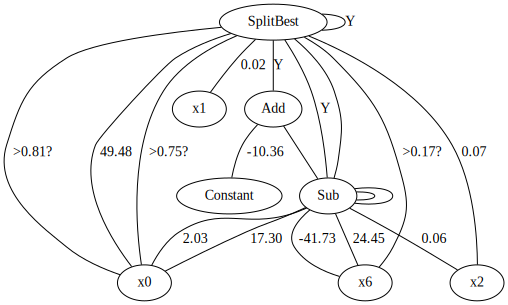

In [6]:
import graphviz

model = est.best_estimator_.get_model("dot")
print(model)
g = graphviz.Source(model)
g

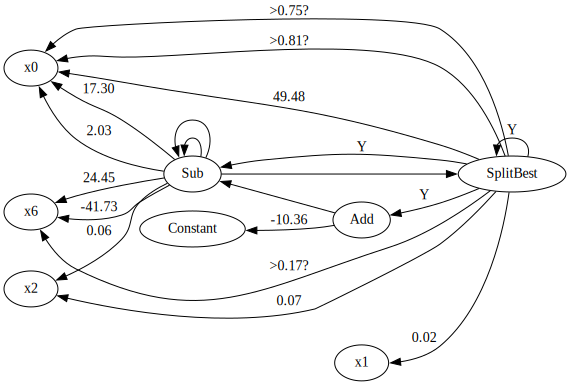

In [16]:
model = """digraph G {
rankdir=RL;
SplitBest [name="0"];
SplitBest -> x0 [label=">0.75?"];
SplitBest -> SplitBest [label="Y"];
SplitBest -> x1 [label="0.02"];
SplitBest [name="1"];
SplitBest -> x0 [label=">0.81?"];
SplitBest -> Sub [label="Y"];
SplitBest -> x0 [label="49.48"];
Sub;
Sub -> SplitBest [label=""];
Sub -> Sub [label=""];
SplitBest;
SplitBest -> x6 [label=">0.17?"];
SplitBest -> Add [label="Y"];
SplitBest -> x2 [label="0.07"];
Add;
Add -> Sub [label=""];
Add -> Constant [label="-10.36"];
Sub;
Sub -> x2 [label="0.06"];
Sub -> Sub [label=""];
x2;
Sub;
Sub -> x6 [label="24.45"];
Sub -> x0 [label="17.30"];
x6;
x0;
Constant;
x2;
Sub;
Sub -> x6 [label="-41.73"];
Sub -> x0 [label="2.03"];
x6;
x0;
x0;
x1;
}
"""

graphviz.Source(model)